# 연구과제(1) 풀이

> 위스콘신 유방암 데이터 셋

## ## #01. 준비작업

### [1] 패키지 가져오기

In [3]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

from helper.util import *
from helper.plot import *
from helper.analysis import *
from helper.classification import *

from statsmodels.stats.outliers_influence import variance_inflation_factor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### [2] 데이터 가져오기

In [4]:
origin = my_read_excel("https://data.hossam.kr/mldata/breast-cancer-wisconsin.xlsx", index_col="id", categories=["diagnosis"])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   diagnosis                569 non-null    category
 1   radius_mean              569 non-null    float64 
 2   texture_mean             569 non-null    float64 
 3   perimeter_mean           569 non-null    float64 
 4   area_mean                569 non-null    float64 
 5   smoothness_mean          569 non-null    float64 
 6   compactness_mean         569 non-null    float64 
 7   concavity_mean           569 non-null    float64 
 8   concave points_mean      569 non-null    float64 
 9   symmetry_mean            569 non-null    float64 
 10  fractal_dimension_mean   569 non-null    float64 
 11  radius_se                569 non-null    float64 
 12  texture_se               569 non-null    float64 
 13  perimeter_se             569 non-null    float64 
 14  are

## #02. 데이터 전처리

1. 종속변수 라벨링
2. 데이터 분할 + 데이터 스케일링
3. 데이터 불균형 해소 (SMOTE)

In [5]:
df1 = my_labelling(origin, 'diagnosis')

x_train, x_test, y_train, y_test = my_train_test_split(df1, 'diagnosis', scalling=True)

xdata, ydata = my_balance(x_train, y_train, method="smote")

## #03. 최적 알고리즘 찾기

### [1] 분석 수행

In [6]:
estimators = my_classification(xdata, ydata, x_test, y_test)
estimators

LogisticRegression({'n_jobs': -1, 'random_state': 1234}) {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [1000]}
KNeighborsClassifier({'n_jobs': -1}) {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
SVC({'random_state': 1234}) {}
GaussianNB({}) {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]}
DecisionTreeClassifier({'random_state': 1234}) {'criterion': ['gini', 'entropy']}
SGDClassifier({'n_jobs': -1, 'random_state': 1234, 'early_stopping': True}) {'loss': ['hinge', 'log_loss', 'modified_huber'], 'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01, 0.1], 'max_iter': [1000, 2000, 3000, 4000, 5000], 'learning_rate': ['optimal', 'constant', 'invscaling', 'adaptive'], 'eta0': [0.01, 0.1, 0.5]}
+------------------------+---------------------------+--------------------+---------------------+------------------+---------------------+---------------+------------+----------+
|     

{'SVC': SVC(random_state=1234),
 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=1234),
 'GaussianNB': GaussianNB(),
 'LogisticRegression': LogisticRegression(C=1, max_iter=1000, n_jobs=-1, random_state=1234),
 'KNeighborsClassifier': KNeighborsClassifier(metric='euclidean', n_jobs=-1, weights='distance'),
 'SGDClassifier': SGDClassifier(early_stopping=True, eta0=0.1, learning_rate='adaptive',
               max_iter=5000, n_jobs=-1, penalty='l1', random_state=1234)}

### [2] 독립변수 보고

In [7]:
my_classification_report(estimators['LogisticRegression'], xdata, ydata, x_test, y_test, sort='v')

+----+---------+------------+-------------------------+--------------------+------------+---------+------------+---------+------------+
|    |   index | 종속변수   | 독립변수                |   B(비표준화 계수) |   표준오차 |       t |   유의확률 |     VIF |   OddsRate |
|----+---------+------------+-------------------------+--------------------+------------+---------+------------+---------+------------|
|  0 |       2 | diagnosis  | perimeter_mean          |             0.3545 |     300.11 |  0.0012 |      0.999 |  8639.6 |     1.4254 |
|  1 |       0 | diagnosis  | radius_mean             |             0.3866 |    303.381 |  0.0013 |      0.999 | 7137.78 |      1.472 |
|  2 |      20 | diagnosis  | radius_worst            |             1.1698 |    138.642 |  0.0084 |      0.993 |  991.95 |     3.2212 |
|  3 |      22 | diagnosis  | perimeter_worst         |             0.8494 |     79.777 |  0.0106 |      0.992 | 838.417 |     2.3382 |
|  4 |       3 | diagnosis  | area_mean               |             0.

## #04. VIF값이 높은 항목을 제거하면서 순차적으로 수행

### [1] 다중 공선성 제거를 위한 VIF값 소거

In [8]:
df2 = my_vif_filter(df1, 'diagnosis', threshold=10)

### [2] 최종 변수를 사용해 분석 후 성능평가

In [9]:
x_train, x_test, y_train, y_test = my_train_test_split(df2, 'diagnosis', scalling=True)

xdata, ydata = my_balance(x_train, y_train, method="smote")

estimators = my_classification(xdata, ydata, x_test, y_test)
estimators

LogisticRegression({'n_jobs': -1, 'random_state': 1234}) {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [1000]}
KNeighborsClassifier({'n_jobs': -1}) {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
SVC({'random_state': 1234}) {}
GaussianNB({}) {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]}
DecisionTreeClassifier({'random_state': 1234}) {'criterion': ['gini', 'entropy']}
SGDClassifier({'n_jobs': -1, 'random_state': 1234, 'early_stopping': True}) {'loss': ['hinge', 'log_loss', 'modified_huber'], 'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01, 0.1], 'max_iter': [1000, 2000, 3000, 4000, 5000], 'learning_rate': ['optimal', 'constant', 'invscaling', 'adaptive'], 'eta0': [0.01, 0.1, 0.5]}
+------------------------+---------------------------+--------------------+---------------------+------------------+---------------------+---------------+------------+----------+
|     

{'SVC': SVC(random_state=1234),
 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=1234),
 'GaussianNB': GaussianNB(),
 'LogisticRegression': LogisticRegression(C=1, max_iter=1000, n_jobs=-1, random_state=1234),
 'KNeighborsClassifier': KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=7,
                      weights='distance'),
 'SGDClassifier': SGDClassifier(early_stopping=True, eta0=0.5, learning_rate='constant',
               n_jobs=-1, penalty='elasticnet', random_state=1234)}

> 성능이 다소 떨어졌으나 큰 차이는 없다.

### [3] 최적의 성능을 보인 모형에 대한 성능 평가 시각화

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.813557 |     0.826228 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy)        |     0.954225 |     0.973684 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision)       |     0.960714 |        0.975 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)          |     0.947183 |      0.95122 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout)       |    0.0387324 |    0.0136986 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)             |     0.961268 |     0.986301 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score                |     0.953901 |     0.962963 | 정밀도와 재

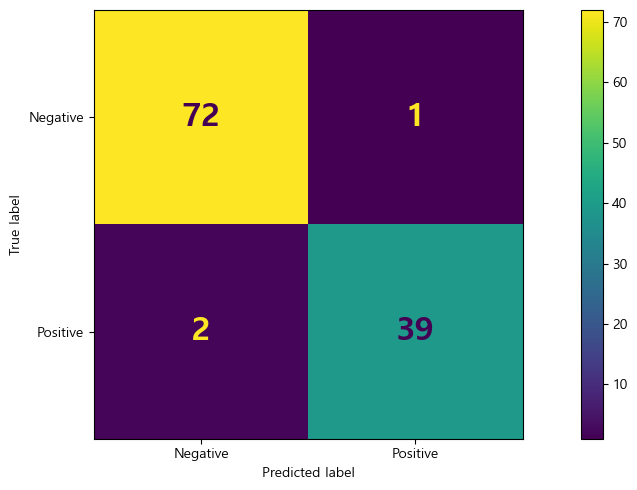


[Roc Curve]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


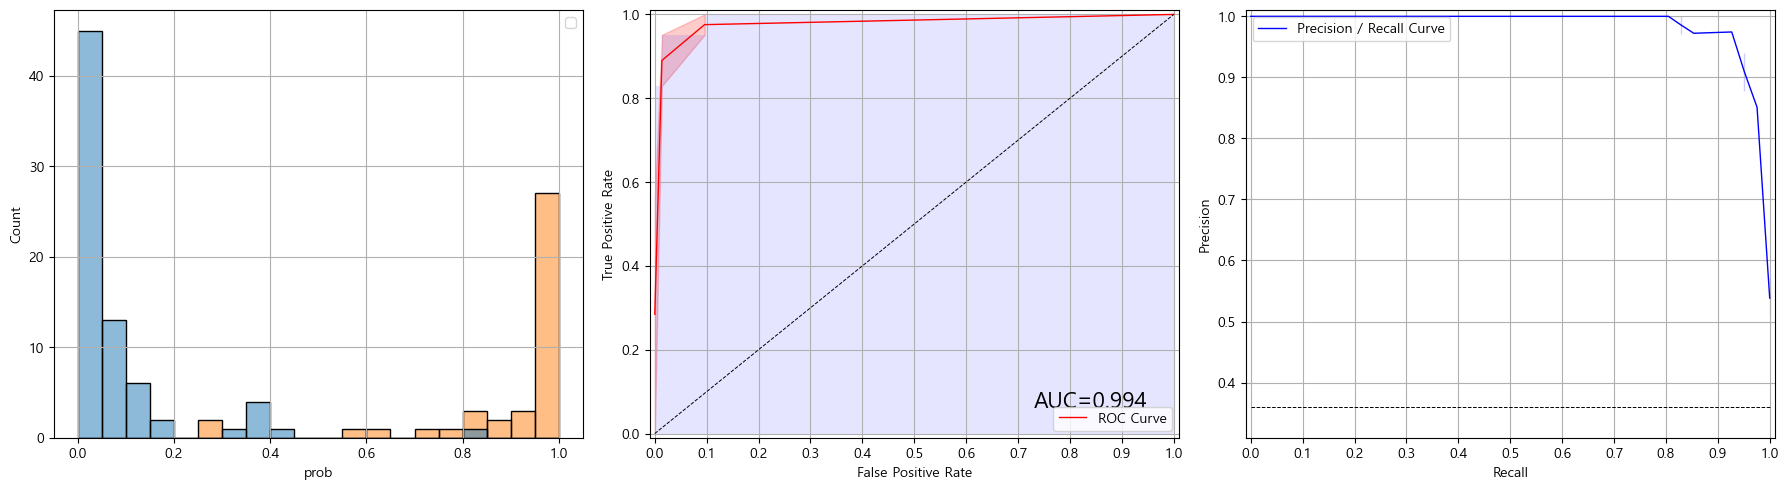


[학습곡선]


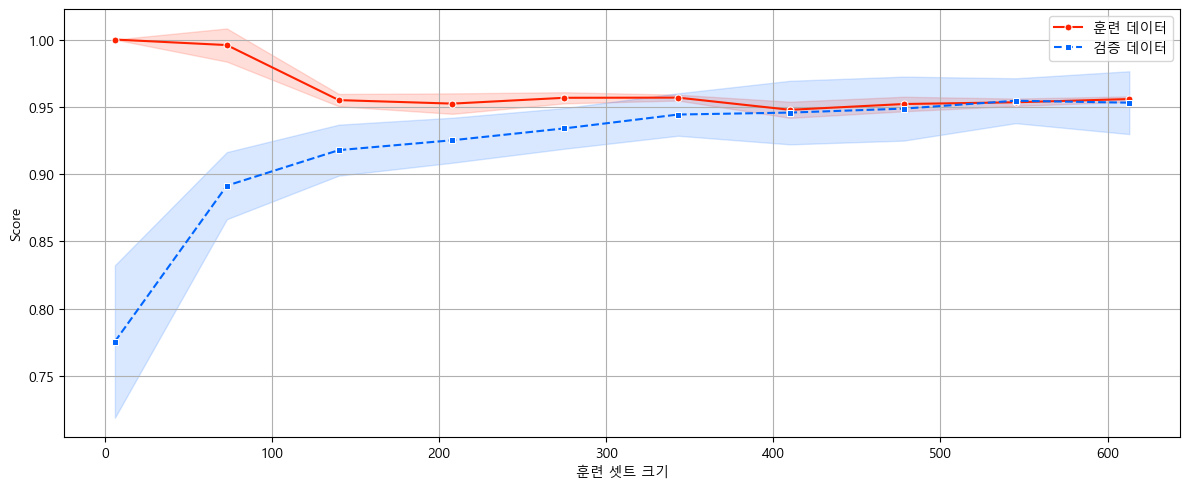

In [10]:
my_classification_result(estimators['LogisticRegression'], xdata, ydata, x_test, y_test)

> 과적합 없이 일반화가 잘 이루어 졌다.

### [4] 독립변수 보고

In [11]:
my_classification_report(estimators['LogisticRegression'], xdata, ydata, x_test, y_test, sort='v')

+----+---------+------------+----------------------+--------------------+------------+---------+------------+---------+------------+
|    |   index | 종속변수   | 독립변수             |   B(비표준화 계수) |   표준오차 |       t |   유의확률 |     VIF |   OddsRate |
|----+---------+------------+----------------------+--------------------+------------+---------+------------+---------+------------|
|  0 |       3 | diagnosis  | concavity_se         |            -1.6629 |      1.536 | -1.0823 |      0.279 | 4.06783 |     0.1896 |
|  1 |       5 | diagnosis  | fractal_dimension_se |            -1.1564 |      1.231 | -0.9391 |      0.348 | 2.83014 |     0.3146 |
|  2 |       6 | diagnosis  | concavity_worst      |             3.6486 |      1.122 |  3.2515 |      0.001 | 2.80527 |    38.4205 |
|  3 |       2 | diagnosis  | smoothness_se        |             0.5075 |       0.68 |  0.7464 |      0.455 | 1.85074 |     1.6612 |
|  4 |       4 | diagnosis  | symmetry_se          |            -0.0281 |       0.74 |  -0.

> 신뢰할 수 있는 변수만 남아있으며 이 값들은 모두 통계적으로 유의함을 알 수 있다.

## #05. 2차항 생성 후 분석

VIF값이 높은 변수를 제거한 `df2`에 대해 2차 항을 생성하고 분석한다.

LogisticRegression({'n_jobs': -1, 'random_state': 1234}) {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [1000]}
KNeighborsClassifier({'n_jobs': -1}) {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
SVC({'random_state': 1234}) {}
GaussianNB({}) {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]}
DecisionTreeClassifier({'random_state': 1234}) {'criterion': ['gini', 'entropy']}
SGDClassifier({'n_jobs': -1, 'random_state': 1234, 'early_stopping': True}) {'loss': ['hinge', 'log_loss', 'modified_huber'], 'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01, 0.1], 'max_iter': [1000, 2000, 3000, 4000, 5000], 'learning_rate': ['optimal', 'constant', 'invscaling', 'adaptive'], 'eta0': [0.01, 0.1, 0.5]}
+------------------------+---------------------------+--------------------+---------------------+------------------+---------------------+---------------+------------+----------+
|     

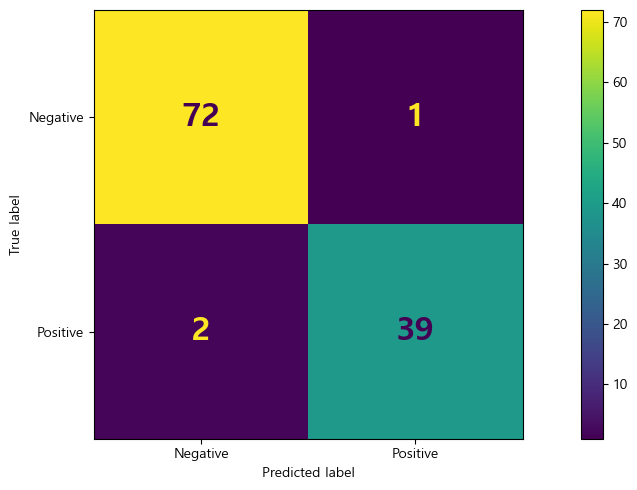

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



[Roc Curve]


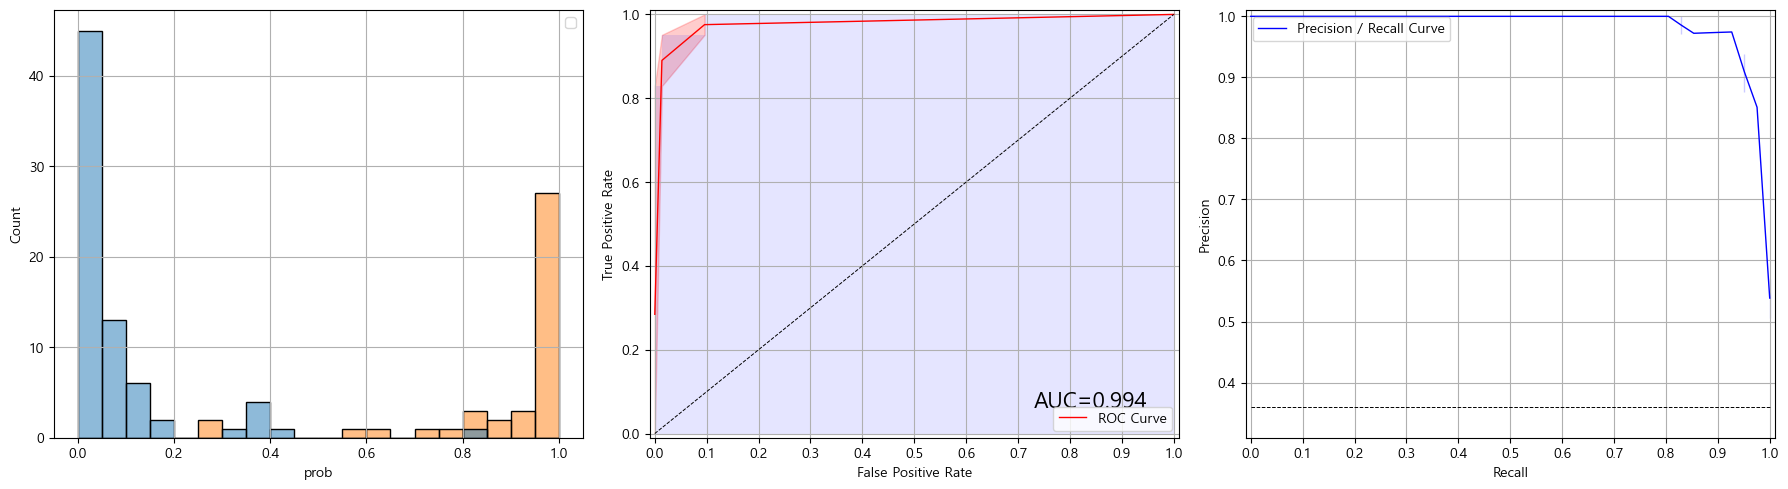


[학습곡선]


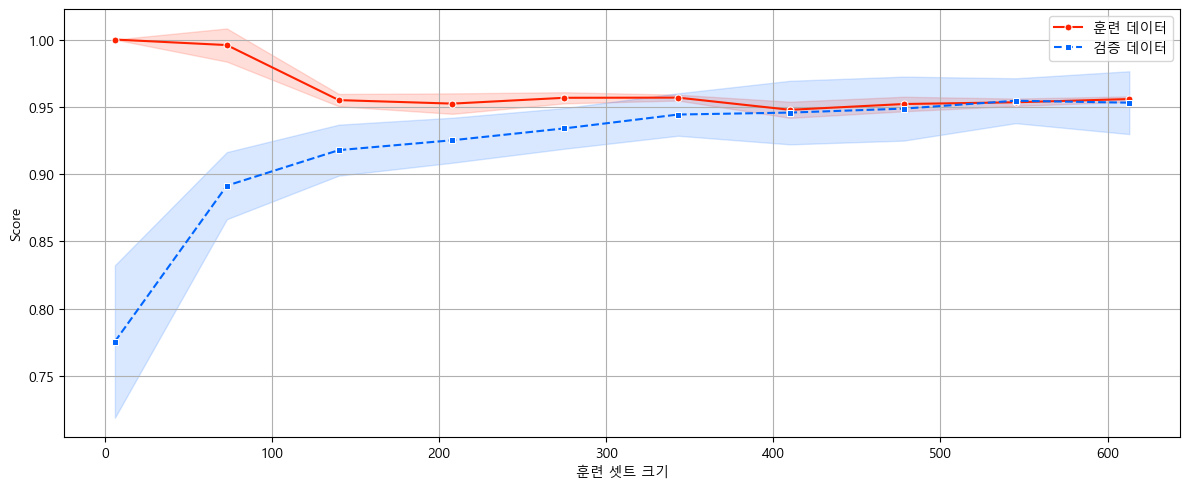

In [25]:
df3 = my_poly_features(df2, ignore=['diagnosis'], degree=2)
df4 = my_vif_filter(df3, 'diagnosis', threshold=10)
x_train, x_test, y_train, y_test = my_train_test_split(df2, 'diagnosis', scalling=True)
xdata, ydata = my_balance(x_train, y_train, method="smote")
estimators = my_classification(xdata, ydata, x_test, y_test)
my_classification_result(estimators['best'], xdata, ydata, x_test, y_test)

> 1차항 만으로 분석한 경우와 차이가 없다.
>
> 3,4,5차 항에 대한 시도도 해 볼 수 있겠지만 실행시간이 너무 오래 걸려서 여기서 결과를 채택함